In [1]:
import sklearn
from sklearn import svm, datasets
import scipy.io as scp

#from scipy import loadmat
from time import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
 
 
#from tensorflow.keras import optimizers
#from tensorflow.keras.callbacks import LearningRateScheduler
#from tensorflow.keras.utils import to_categorical
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D,Dropout,SeparableConv2D
from tensorflow.keras.layers import Conv1D,AveragePooling1D,AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
#from keras.utils import layer_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.keras.applications.imagenet_utils import preprocess_input
 
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model


import tensorflow.python.keras.backend as K
import math
#from matplotlib.pyplot import imshow
#import pydot
import h5py

import tf2onnx



In [2]:
def Net(input_shape):
    """
    Implementation of the HappyModel.
    
    TESTA OPZIONE SeparableConv2D!!
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
        # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = X_input

    # CONV -> BN -> RELU Block applied to X
    #X = DepthwiseConv2D(NUMBER_OF_CHANNELS, (1, 7), name='conv0')(X)  #DepthWiseConv applies the filter to each channel of the immage and gives to output n channels
    X = Conv2D(kernel_size =(1, 7), filters = NUMBER_OF_CHANNELS, strides=(1, 1), padding = 'same', name='conv0')(X)  
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu',name='relu_0')(X)

    # AVGPOOL
    #X = MaxPooling2D((2, 2), name='max_pool1')(X)
    X = AveragePooling2D((1, 2),strides=(1, 2),padding='valid', name='avg_pool0')(X)
    #MaxPooling2D((2, 2),strides=(2, 2), name='max_pool0')(X) 
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(1, (1, 10), strides=(1, 2),padding = 'same', name='conv1')(X)
    X = BatchNormalization(axis=3, name='bn1')(X)
    X = Activation('relu',name='relu_1')(X)

    # MAXPOOL
    #X = MaxPooling2D((2, 2),strides=(2, 1), name='max_pool1',)(X)
    X = MaxPooling2D((1, 2),name='max_pool1',)(X)
    
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(2, (1, 13), strides=(1, 1), padding = 'same',name='conv2')(X)    #IL FILTRO ERA 13 13 !!!!
    X = BatchNormalization(axis=3, name='bn2')(X)
    X = Activation('relu',name='relu_2')(X)

    # MAXPOOL
    X = MaxPooling2D((1, 2), name='max_pool2')(X)
    
   
    #X = Conv2D(80, (10, 1), strides=(1, 1), dilation_rate=(5, 1), padding='same', name='conv3_TC')(X)    #IL FILTRO ERA 13 13 !!!!
    #X = BatchNormalization(axis=3, name='bn3')(X)
    #X = Activation('relu',name='relu_3')(X)
    
    
    #X = Conv2D(80, (10, 1), strides=(1, 1), dilation_rate=(5, 1), padding='valid', name='conv4_TC')(X)    #IL FILTRO ERA 13 13 !!!!
    #X = BatchNormalization(axis=3, name='bn4')(X)
    #X = Activation('relu',name='relu_4')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(4, (1, 18), strides=(1, 1), padding = 'valid', name='conv3')(X)    #IL FILTRO ERA 13 13 !!!!
    X = BatchNormalization(axis=3, name='bn3')(X)
    X = Activation('relu',name='relu_3')(X)

    # MAXPOOL
    X = MaxPooling2D((1, 2), name='max_pool3')(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(16, (1, 22), strides=(1, 1), padding = 'valid', name='conv4')(X)    #IL FILTRO ERA 13 13 !!!!
    X = BatchNormalization(axis=3, name='bn4')(X)
    X = Activation('relu',name='relu_4')(X)

    # MAXPOOL
    X = MaxPooling2D((1, 2), name='max_pool4')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(8, (1, 24), strides=(1, 1), padding = 'valid', name='conv5')(X)    #IL FILTRO ERA 13 13 !!!!
    X = BatchNormalization(axis=3, name='bn5')(X)
    X = Activation('relu',name='relu_5')(X)

    X = Conv2D(32, (1, 1), strides=(1, 1), padding = 'valid', name='conv6')(X)    #IL FILTRO ERA 13 13 !!!!
    X = BatchNormalization(axis=3, name='bn6')(X)
    X = Activation('relu',name='relu_6')(X)
 
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc1')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='HappyModel')


    return model

In [3]:
#Patient = 2
sampling_rate = 250
#seizure_start_s = 180
#seizure_post = 180
#seizure_start = sampling_rate * seizure_start_s
#working_dir = '/content/drive/My Drive/ECG_data/'
#working_dir = 'ECG_data/'
#working_dir = '../MATLAB/Matlab/ECG/Script/workspace/Subjects2'


false_positive = 0
training_complete = 0
seizure_available = 1

In [6]:
### DATA_OFF Regular
### DATA_ON Irregular

#loading_file = '../MATLAB/Matlab/ECG/Script/workspace/Perfetti/16539_1.mat'
loading_file1 = './Perfetti/16539_1.mat'
data_training1 = scp.loadmat(loading_file1)
#data_training = data_training['val']
data_off1 = data_training1['val'].transpose()

loading_file2 = './Perfetti/16773_1.mat'
data_training2 = scp.loadmat(loading_file2)
#data_training = data_training['val']
data_off2 = data_training2['val'].transpose()

loading_file3 = './Perfetti/16786_1.mat'
data_training3 = scp.loadmat(loading_file3)
#data_training = data_training['val']
data_off3 = data_training3['val'].transpose()


loading_file4 = './Perfetti/01m.mat'
data_training4 = scp.loadmat(loading_file4)
data_on4 = data_training4['val'].transpose()

loading_file5 = './Perfetti/06m.mat'
data_training5 = scp.loadmat(loading_file5)
data_on5 = data_training5['val'].transpose()

loading_file6 = './Perfetti/07m.mat'
data_training6 = scp.loadmat(loading_file6)
data_on6 = data_training6['val'].transpose()

data_off = np.concatenate((data_off1,data_off2,data_off3), axis = 0)
data_on = np.concatenate((data_on4,data_on5,data_on6), axis = 0)


print(type(data_on))
print(data_on.shape)
print(type(data_off))
print(data_off.shape)



<class 'numpy.ndarray'>
(3000000, 1)
<class 'numpy.ndarray'>
(3000000, 1)


In [5]:
loading_file4 = "ECG5000/chf07m.mat"
data_training4 = scp.loadmat(loading_file4)

In [8]:

data_training4['val'].shape

(1, 1000000)

In [10]:
!pip install scikit-learn

In [12]:
!export SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True 
!pip install pyECG

'export' is not recognized as an internal or external command,
operable program or batch file.


  Using cached pyECG-0.0.9.1-py2.py3-none-any.whl (14 kB)
  Using cached ishneholterlib-2017.4.11.tar.gz (7.0 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached wfdb-2.2.1.tar.gz (94 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pytest-7.4.0-py3-none-any.whl (323 kB)
  Using cached pytest_cov-4.1.0-py3-none-any.whl (21 kB)
  Using cached pycrc-0.10.0-py3-none-any.whl (33 kB)
  Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  Using cached pandas-2.0.3-cp311-cp311-win_amd64.whl (10.6 MB)
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [7]:
""" plt.figure(figsize=(24.0, 8.0))
plt.plot(data_off.flatten()[500000:520000])
plt.grid()
plt.show()

plt.figure(figsize=(24.0, 8.0))
plt.plot(data_on.flatten()[500000:520000])
plt.grid()
plt.show() """

' plt.figure(figsize=(24.0, 8.0))\nplt.plot(data_off.flatten()[500000:520000])\nplt.grid()\nplt.show()\n\nplt.figure(figsize=(24.0, 8.0))\nplt.plot(data_on.flatten()[500000:520000])\nplt.grid()\nplt.show() '

In [8]:
sample = 250*10  #SIZE OF THE IMAGE (WINDOWS).. IMAGE IS sample x nchannels  long image 1024
overlap = 250*5   #if sample is 250*10 and overlap is 250*5 => overlap 50%  #best 384 long image  960
#training_amount = 0.85  #optimal number of epochs to train #best 0.85    #CHECK FOR OVERFITTING!!!! 
NUMBER_OF_CHANNELS = data_on.shape[1]
print("NUMBER OF CHANNELS", NUMBER_OF_CHANNELS)


#CREA LABEL PER DATi ON E OFF

label_off = np.zeros((data_off.shape[0],1))
label_on = np.ones((data_on.shape[0],1))

print(label_off.shape)
print(label_on.shape)

print("IMAGE SIZE = ", sample)
print("IMAGE OVERLAP = ", overlap)
#print("TRAINING DATA SIZE (%)", training_amount * 100)  #training amount *100 is the percentage (%) of data used for the training
print("\n \n")

NUMBER OF CHANNELS 1
(3000000, 1)
(3000000, 1)
IMAGE SIZE =  2500
IMAGE OVERLAP =  1250

 



In [9]:
modello=Net((1,2500,1))
modello.summary()

Model: "HappyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 2500, 1)]      0         
                                                                 
 conv0 (Conv2D)              (None, 1, 2500, 1)        8         
                                                                 
 bn0 (BatchNormalization)    (None, 1, 2500, 1)        4         
                                                                 
 relu_0 (Activation)         (None, 1, 2500, 1)        0         
                                                                 
 avg_pool0 (AveragePooling2D  (None, 1, 1250, 1)       0         
 )                                                               
                                                                 
 conv1 (Conv2D)              (None, 1, 625, 1)         11        
                                                        

In [10]:
# ========================================================
# CREO TENSORE E FACCIO NUMERO IMMAGINI PER data_off
# ========================================================

#divido data_off in finestre (immagini) 

print("DATA OFF \n")
print("data_off_size original", data_off.shape)

L_total = data_off.shape[0];
print(sample,overlap)
print(L_total)
#N_imm = (L_total - sample)/(sample - overlap) +1 
n_images = (L_total - overlap)//(sample - overlap) #number of windows

#print(N_imm)
#n_images  = math.floor(N_imm)


print("DATA LENGTH OFF = ", L_total)
print("NUMBER OF IMAGES OFF = " , n_images)

data_off_r = np.zeros([n_images,sample,NUMBER_OF_CHANNELS,1],dtype=float)
stride = sample - overlap
for i in range(0,n_images): 
    data_off_r[i,0:sample,0:NUMBER_OF_CHANNELS,0] = data_off[(i*stride):(i*stride + sample),:]  #control the overlaps [(i*stride):(i*stride + sample),:]

label_images_off = label_off[:(L_total-sample + 1):(sample - overlap)]    
print("DATA RESIZE SHAPE = ", data_off_r.shape)
print("label_images off length",label_images_off.shape[0])

DATA OFF 

data_off_size original (3000000, 1)
2500 1250
3000000
DATA LENGTH OFF =  3000000
NUMBER OF IMAGES OFF =  2399
DATA RESIZE SHAPE =  (2399, 2500, 1, 1)
label_images off length 2399


In [11]:
# ========================================================
# CREO TENSORE E FACCIO NUMERO IMMAGINI PER data_on
# ========================================================

print("DATA ON \n")
print("data_on_size original", data_on.shape)

L_total = data_on.shape[0];
#N_imm = (L_total - sample)/(sample - overlap) +1 
N_imm = (L_total - overlap)/(sample - overlap) #number of windows
n_images  = math.floor(N_imm)

print("DATA LENGTH ON = ", L_total)
print("NUMBER OF IMAGES ON = " , n_images)

data_on_r = np.zeros([n_images,sample,NUMBER_OF_CHANNELS,1],dtype=float)
stride = sample - overlap
for i in range(0,n_images): 
    data_on_r[i,0:sample,0:NUMBER_OF_CHANNELS,0] = data_on[(i*stride):(i*stride + sample),:]  #control the ovelaps [(i*stride):(i*stride + sample),:]

label_images_on = label_on[:(L_total-sample + 1):(sample - overlap)]
print("DATA RESIZE SHAPE = ", data_on_r.shape)
print("label_images on length",label_images_on.shape[0])

DATA ON 

data_on_size original (3000000, 1)
DATA LENGTH ON =  3000000
NUMBER OF IMAGES ON =  2399
DATA RESIZE SHAPE =  (2399, 2500, 1, 1)
label_images on length 2399


In [12]:
# ========================================================
#TESTSET
# ========================================================

#off (regular)
loading_file0 = './Perfetti/16273_1.mat'        
data_testing0 = scp.loadmat(loading_file0)
data_test0 = data_testing0['val'].transpose()
print('test_0',type(data_test0))
print('test_0',data_test0.shape)

#on (irregular)
loading_file1 = './Perfetti/03m.mat'        
#loading_file1 = './ECG5000/chf07m.mat'        
data_testing1 = scp.loadmat(loading_file1)
data_test1 = data_testing1['val'].transpose()
print('test1',type(data_test1))
print('test1',data_test1.shape)

# ========================================================
# CREO TENSORE E FACCIO NUMERO IMMAGINI PER data_test1 e data_test2
# ========================================================

L_total = data_test1.shape[0];
#N_imm = (L_total - sample)/(sample - overlap) +1 
N_imm = (L_total - overlap)/(sample - overlap) #number of windows
n_images  = math.floor(N_imm)

print("DATA LENGTH ON = ", L_total)
print("NUMBER OF IMAGES ON = " , n_images)

data_test1_r = np.zeros([n_images,sample,NUMBER_OF_CHANNELS,1],dtype=float) #tensore array di zeri
data_test_off = np.zeros([n_images,sample,NUMBER_OF_CHANNELS,1],dtype=float)
stride = sample - overlap
for i in range(0,n_images): 
    data_test1_r[i,0:sample,0:NUMBER_OF_CHANNELS,0] = data_test1[(i*stride):(i*stride + sample),:]
    data_test_off[i,0:sample,0:NUMBER_OF_CHANNELS,0] = data_test0[(i*stride):(i*stride + sample),:]

print("DATA RESIZE SHAPE = ", data_test1_r.shape)



test_0 <class 'numpy.ndarray'>
test_0 (1000000, 1)
test1 <class 'numpy.ndarray'>
test1 (1000000, 1)
DATA LENGTH ON =  1000000
NUMBER OF IMAGES ON =  799
DATA RESIZE SHAPE =  (799, 2500, 1, 1)


In [13]:

# ========================================================
# concateno DATI TRAIN (OFF ON) e DATI TEST (OFF ON)
# ========================================================

X_train = np.concatenate((data_off_r,data_on_r), axis = 0)    
y_train = np.concatenate((label_images_off,label_images_on), axis = 0)  #y_train are the labels of the train data

#X_test = np.concatenate((data_testing_off,data_testing_on), axis = 0) 
y_test = np.concatenate([np.zeros((data_test1_r.shape[0],1)),np.ones((data_test1_r.shape[0],1))])  #y_test are the labels of the test data
X_test = np.concatenate([data_test_off,data_test1_r])

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

X_train shape: (4798, 2500, 1, 1)
Y_train shape: (4798, 1)
X_test shape: (1598, 2500, 1, 1)
Y_test shape: (1598, 1)


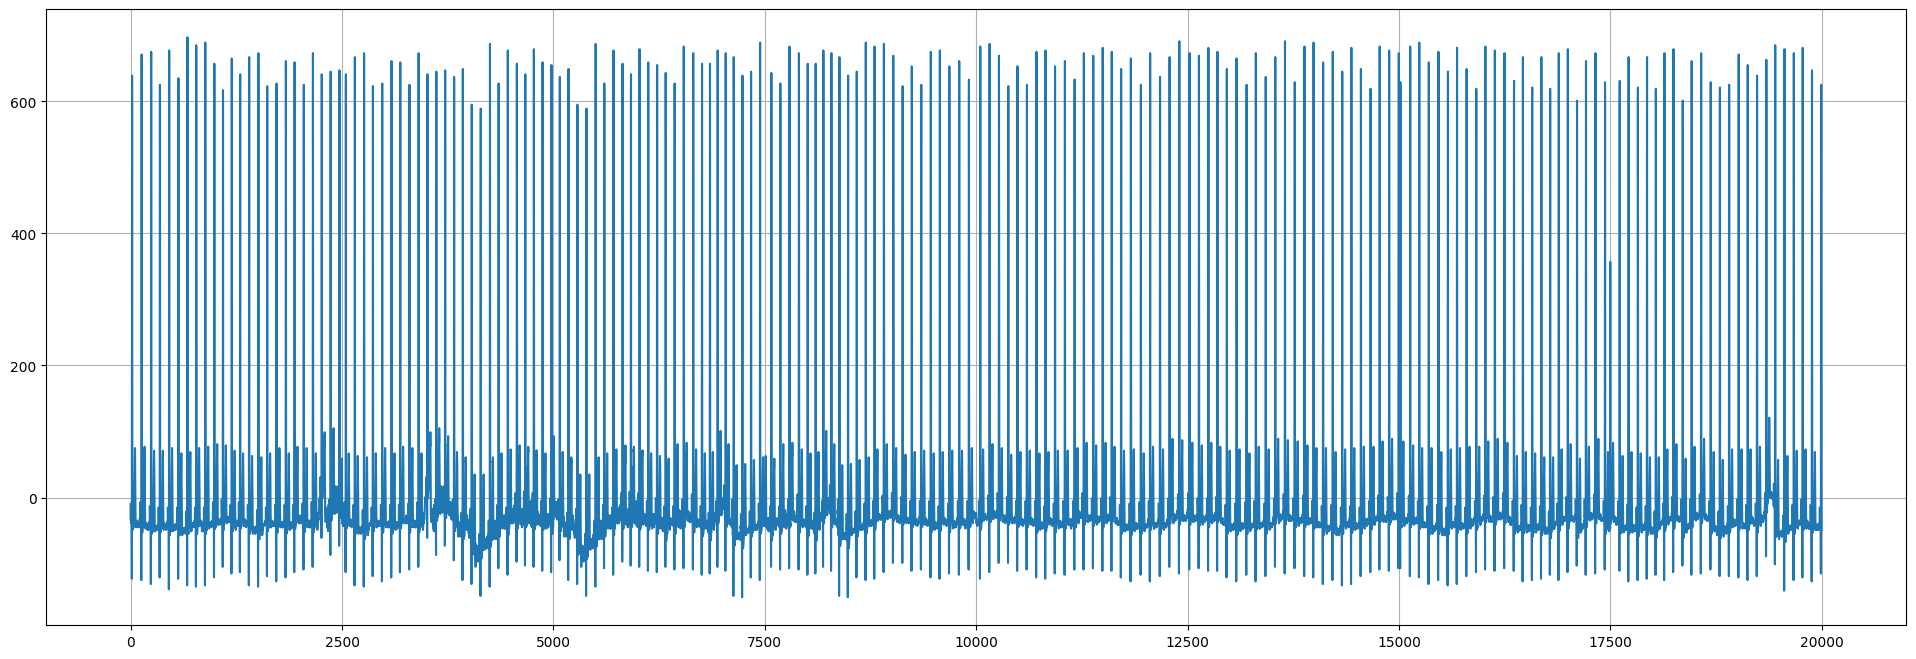

In [14]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(24.0, 8.0))
plt.plot(X_test.flatten()[500000:520000])
plt.grid()
plt.show() 


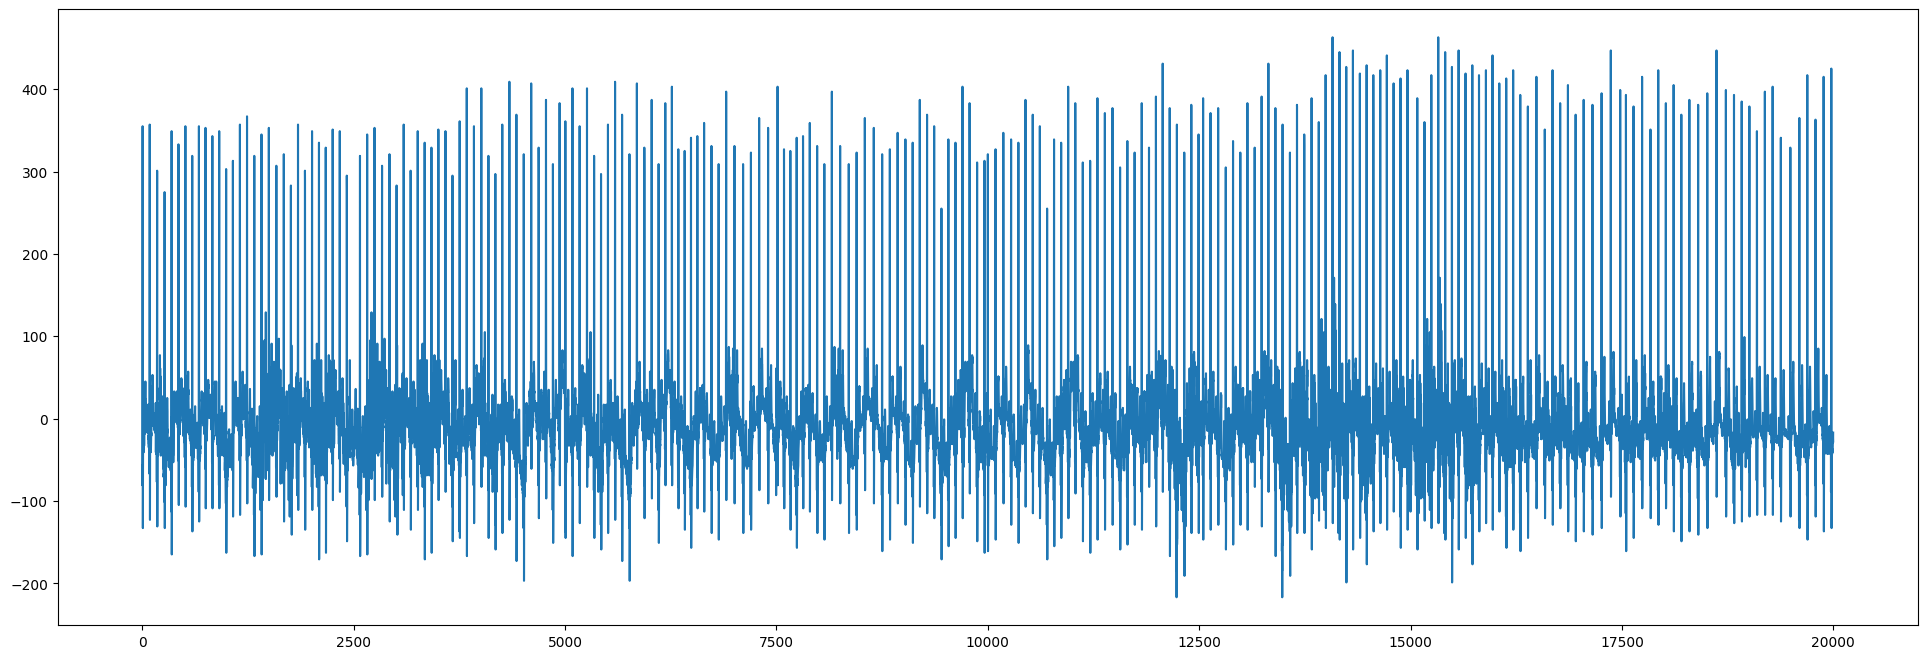

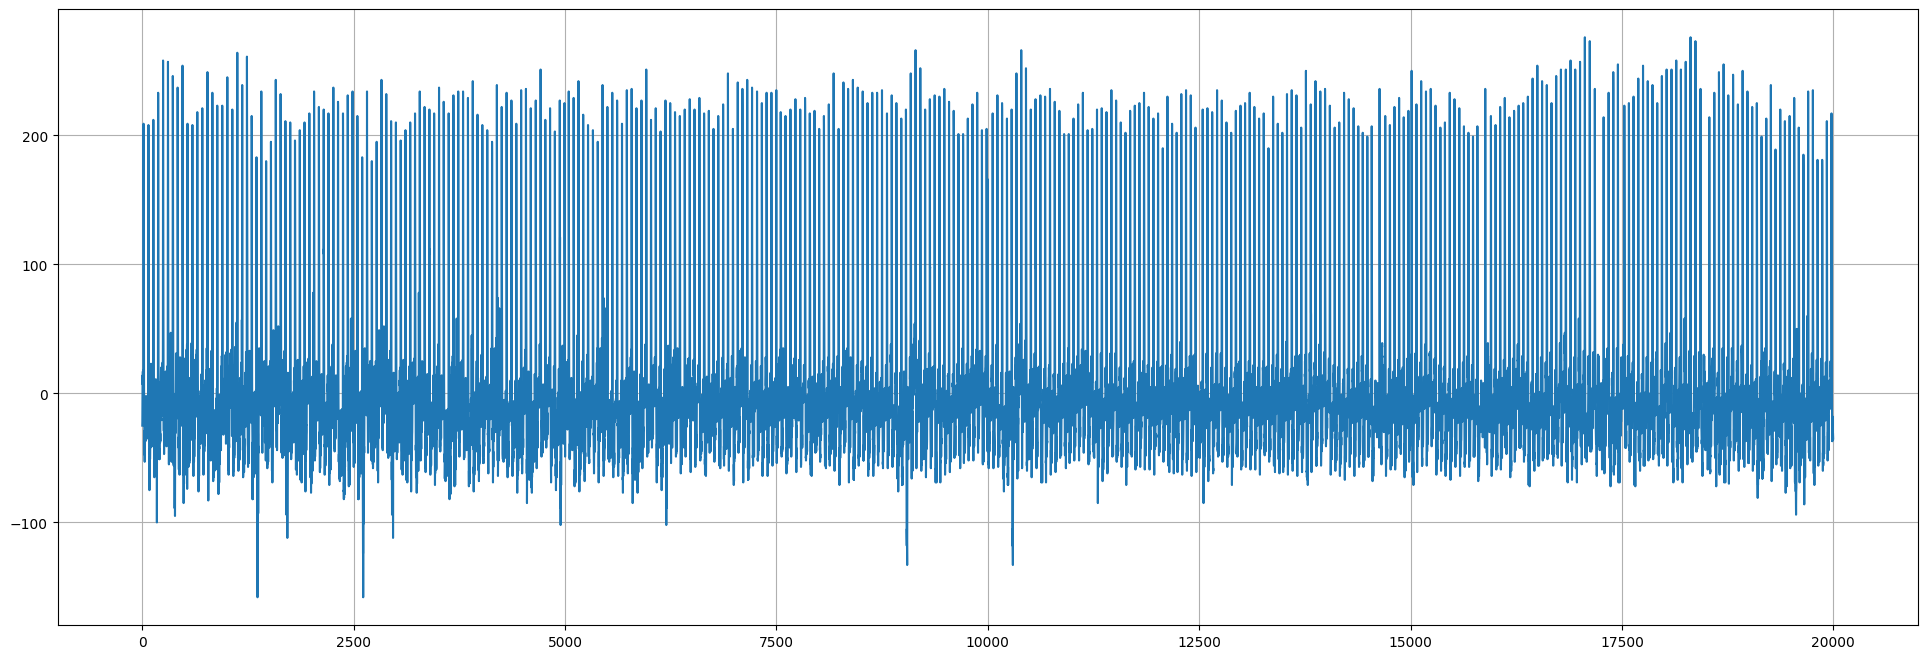

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24.0, 8.0))
plt.plot(data_off_r.flatten()[500000:520000])
plt.figure(figsize=(24.0, 8.0))
plt.plot(data_on_r.flatten()[500000:520000])

plt.grid()
plt.show() 

In [16]:
# ========================================================
# TRANSPOSITION (Change the elements position)
# ========================================================

X_train = X_train.transpose((0, 3, 1,2))    
X_test = X_test.transpose((0, 3, 1,2))      

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

X_train shape: (4798, 1, 2500, 1)
Y_train shape: (4798, 1)
X_test shape: (1598, 1, 2500, 1)
Y_test shape: (1598, 1)


In [23]:

# ========================================================
# NETWORK TRAINING
# ========================================================
      
net = Net(X_train.shape[1:])   
    
net.summary()
#opt = keras.optimizers.Adam(learning_rate=0.01)
#net.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
net.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
history = net.fit(X_train, y_train, epochs=22, verbose=2, batch_size=32, validation_data = (X_test, y_test))

Model: "HappyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 2500, 1)]      0         
                                                                 
 conv0 (Conv2D)              (None, 1, 2500, 1)        8         
                                                                 
 bn0 (BatchNormalization)    (None, 1, 2500, 1)        4         
                                                                 
 relu_0 (Activation)         (None, 1, 2500, 1)        0         
                                                                 
 avg_pool0 (AveragePooling2D  (None, 1, 1250, 1)       0         
 )                                                               
                                                                 
 conv1 (Conv2D)              (None, 1, 625, 1)         11        
                                                        

In [18]:
tf2onnx.convert.from_keras(net, output_path='model.onnx') #visualize the model.onnx on Netron website


(ir_version: 8
 opset_import {
   domain: ""
   version: 15
 }
 opset_import {
   domain: "ai.onnx.ml"
   version: 2
 }
 producer_name: "tf2onnx"
 producer_version: "1.14.0 8f8d49"
 graph {
   node {
     input: "input_2"
     input: "new_shape__83"
     output: "HappyModel/conv0/BiasAdd__6:0"
     name: "HappyModel/conv0/BiasAdd__6"
     op_type: "Reshape"
     domain: ""
   }
   node {
     input: "HappyModel/conv0/BiasAdd__6:0"
     input: "HappyModel/conv0/BiasAdd_weights_fused_bn"
     input: "HappyModel/conv0/BiasAdd_bias_fused_bn"
     output: "HappyModel/bn0/FusedBatchNormV3:0"
     name: "HappyModel/conv0/BiasAdd"
     op_type: "Conv"
     domain: ""
     attribute {
       name: "dilations"
       type: INTS
       ints: 1
       ints: 1
     }
     attribute {
       name: "strides"
       type: INTS
       ints: 1
       ints: 1
     }
     attribute {
       name: "kernel_shape"
       type: INTS
       ints: 1
       ints: 7
     }
     attribute {
       name: "pads"
   

In [19]:
y_pred_test = net(X_test)

In [20]:
y_pred_test = y_pred_test.numpy().ravel()
y_pred_test[y_pred_test >= 0.5] = 1
y_pred_test[y_pred_test < 0.5] = 0

y_pred_test.shape

(1598,)

In [21]:
y_test = y_test.ravel()
y_test.shape


(1598,)

924
674
f1 score 0.9151391717583164


NameError: name 'fbeta_score' is not defined

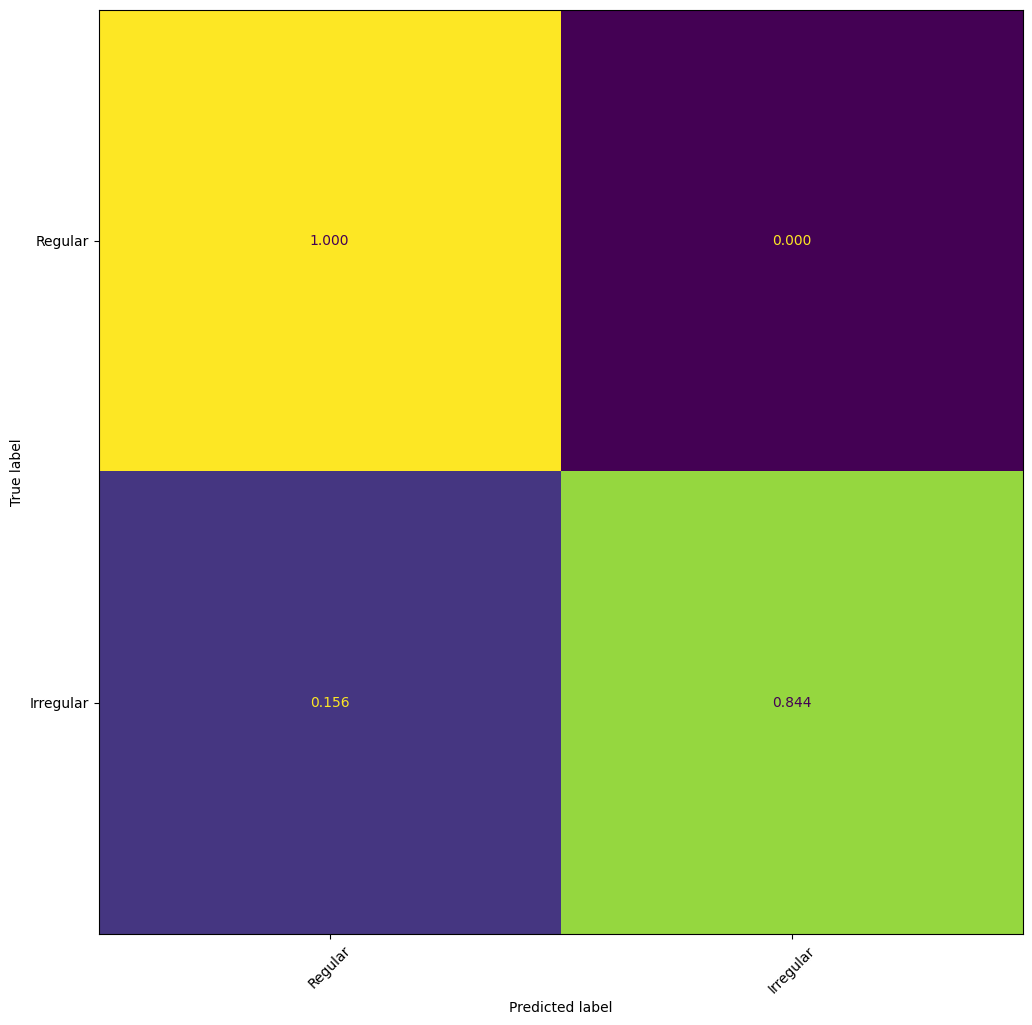

In [22]:
'''
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)

#y_test=np.load('y_test.npy')
#y_pred_test=np.load('y_pred_test.npy')
print(np.sum(y_pred_test==0))
print(np.sum(y_pred_test==1))
_, ax = plt.subplots(figsize=(16, 12)) #figsize weight*high  #'_,' is as 'figure;' in matlab
ax.grid(False)
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_test, #y_test
    normalize="true",
    #display_labels=list(action_dict.keys()),
    display_labels=('regular', 'irregular'),
    xticks_rotation=45,
    values_format=".3f",
	cmap=plt.cm.Blues,
    ax=ax,
)
im = ax.images 
cb = im[-1].colorbar  
cb.remove()

print('f1 score',f1_score(y_test,y_pred_test))
#disp.ax_.set_title(f"Test results (subject {SUBJECT} {MVC}% MVC)")
plt.show()
'''
# ========================================================
# CONFUSION MATRIX

# ========================================================
import matplotlib.pyplot as plt
import matplotlib

print(np.sum(y_pred_test==0))
print(np.sum(y_pred_test==1))

_, ax = plt.subplots(figsize=(16, 12)) #figsize weight*high  #'_,' is as 'figure;' in matlab
ax.grid(False)
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_test, #y_test
    normalize="true",
    #display_labels=list(action_dict.keys()),
    display_labels=('Regular', 'Irregular'),
    xticks_rotation=45,
    values_format=".3f",
    ax=ax,
)
im = ax.images 
cb = im[-1].colorbar  
cb.remove()

print('f1 score',f1_score(y_test,y_pred_test))
print('f2 score', fbeta_score(y_test,y_pred_test,2))
#disp.ax_.set_title(f"Test results (subject {SUBJECT} {MVC}% MVC)")
plt.show()
#plt.savefig(path)
